In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from itertools import combinations
from collections import Counter
from operator import itemgetter
from networkx.algorithms import community
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
df = pd.read_csv('data/mentions_edges50.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head(3)

,edges,weights
0,"('one america news', 'newsmax')",0.753247
1,"('donald j. trump', 'senator ted cruz')",0.584416
2,"('house republicans', 'senate republicans')",1.000000


In [5]:
edges_list=[]
for index, row in df.iterrows():
    weight = row.values[1] # holds weight as int for placement
    tup = row.values[0]    
    tup = tup.replace("(", "")
    tup = tup.replace(")", "")
    tup = tup.replace("'", "")
    tup = tup.split(', ')
    temp_data = [tup[0], tup[1], weight]
    edges_list.append(temp_data)

edges_df = pd.DataFrame(edges_list, columns=['edge1', 'edge2', 'weight'])

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
G = nx.MultiGraph()
G = nx.from_pandas_edgelist(edges_df, source='edge1', target='edge2', edge_attr=["weight"])

In [8]:
print(G.number_of_edges())
print(G.number_of_nodes())

76
25


In [9]:
# creates dict of nodes
nodes = dict(G.nodes())

In [10]:
# converts to multigraph, with self-loops and parallel edges
mentionsG = nx.MultiGraph(G)

In [11]:
deg = dict(nx.degree(mentionsG))

In [12]:
deg

{'one america news': 10,
 'newsmax': 10,
 'donald j. trump': 19,
 'senator ted cruz': 6,
 'house republicans': 10,
 'senate republicans': 10,
 'gop': 10,
 'greg kelly': 8,
 'ezra a. cohen': 8,
 'brandon straka': 8,
 'u.s. supreme court': 8,
 'senator john cornyn': 6,
 'ronna mcdaniel': 6,
 'troy nehls': 6,
 'vice president kamala harris': 3,
 'mike pence': 7,
 'rudy w. giuliani': 1,
 'nbc news': 1,
 'fox news': 3,
 'kevin mccarthy': 4,
 'donald trump jr.': 1,
 'lin wood': 2,
 'sidney powell 🇺🇸⭐⭐⭐ #kraken': 2,
 'breitbart news': 2,
 'general flynn': 1}

In [13]:
isolates = nx.isolates(mentionsG)

In [14]:
mentionsG.remove_nodes_from(isolates)

In [15]:
isolates = nx.isolates(mentionsG)


In [16]:
sorted_degree = sorted(deg.items(), key=itemgetter(1), reverse=True)

In [17]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('donald j. trump', 19)
('one america news', 10)
('newsmax', 10)
('house republicans', 10)
('senate republicans', 10)
('gop', 10)
('greg kelly', 8)
('ezra a. cohen', 8)
('brandon straka', 8)
('u.s. supreme court', 8)
('mike pence', 7)
('senator ted cruz', 6)
('senator john cornyn', 6)
('ronna mcdaniel', 6)
('troy nehls', 6)
('kevin mccarthy', 4)
('vice president kamala harris', 3)
('fox news', 3)
('lin wood', 2)
('sidney powell 🇺🇸⭐⭐⭐ #kraken', 2)


In [18]:
#betweenness_dict = nx.betweenness_centrality(hashG) # Run betweenness centrality
#eigenvector_dict = nx.eigenvector_centrality(hashG) # Run eigenvector centrality

In [19]:
communities = community.greedy_modularity_communities(mentionsG)

In [20]:
len(communities)

13

In [21]:
# #creates a number value for each person based on community to which they belong

# modularity_dict = {} 
# for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
#     for name in c: # Loop through each person in a community
#         modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [22]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 5: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

In [23]:
# #how to get neighbors
# list(hashG.neighbors('wwg1wga'))

In [24]:
nx.degree_centrality(mentionsG)

{'one america news': 0.41666666666666663,
 'newsmax': 0.41666666666666663,
 'donald j. trump': 0.7916666666666666,
 'senator ted cruz': 0.25,
 'house republicans': 0.41666666666666663,
 'senate republicans': 0.41666666666666663,
 'gop': 0.41666666666666663,
 'greg kelly': 0.3333333333333333,
 'ezra a. cohen': 0.3333333333333333,
 'brandon straka': 0.3333333333333333,
 'u.s. supreme court': 0.3333333333333333,
 'senator john cornyn': 0.25,
 'ronna mcdaniel': 0.25,
 'troy nehls': 0.25,
 'vice president kamala harris': 0.125,
 'mike pence': 0.29166666666666663,
 'rudy w. giuliani': 0.041666666666666664,
 'nbc news': 0.041666666666666664,
 'fox news': 0.125,
 'kevin mccarthy': 0.16666666666666666,
 'donald trump jr.': 0.041666666666666664,
 'lin wood': 0.08333333333333333,
 'sidney powell 🇺🇸⭐⭐⭐ #kraken': 0.08333333333333333,
 'breitbart news': 0.08333333333333333,
 'general flynn': 0.041666666666666664}

In [25]:
len(list(nx.find_cliques(mentionsG)))

12

In [26]:
# can you put the cliques into new graph and draw them?

gl = list(nx.find_cliques(mentionsG))
# nx.draw(G, with_labels=True)

In [27]:
gl

[['fox news', 'one america news', 'newsmax'],
 ['fox news', 'nbc news'],
 ['general flynn', 'sidney powell 🇺🇸⭐⭐⭐ #kraken'],
 ['donald j. trump',
  'house republicans',
  'senate republicans',
  'ezra a. cohen',
  'u.s. supreme court',
  'one america news',
  'newsmax',
  'brandon straka',
  'greg kelly'],
 ['donald j. trump',
  'house republicans',
  'senate republicans',
  'kevin mccarthy',
  'gop'],
 ['donald j. trump',
  'senator ted cruz',
  'ronna mcdaniel',
  'troy nehls',
  'mike pence',
  'gop',
  'senator john cornyn'],
 ['donald j. trump', 'rudy w. giuliani'],
 ['donald j. trump', 'vice president kamala harris', 'gop', 'mike pence'],
 ['donald j. trump', 'donald trump jr.'],
 ['donald j. trump', 'lin wood'],
 ['breitbart news', 'one america news', 'newsmax'],
 ['sidney powell 🇺🇸⭐⭐⭐ #kraken', 'lin wood']]

In [28]:
# # this seems important to drawing 
# betCent = nx.betweenness_centrality(hashG, normalized=True, endpoints=True)

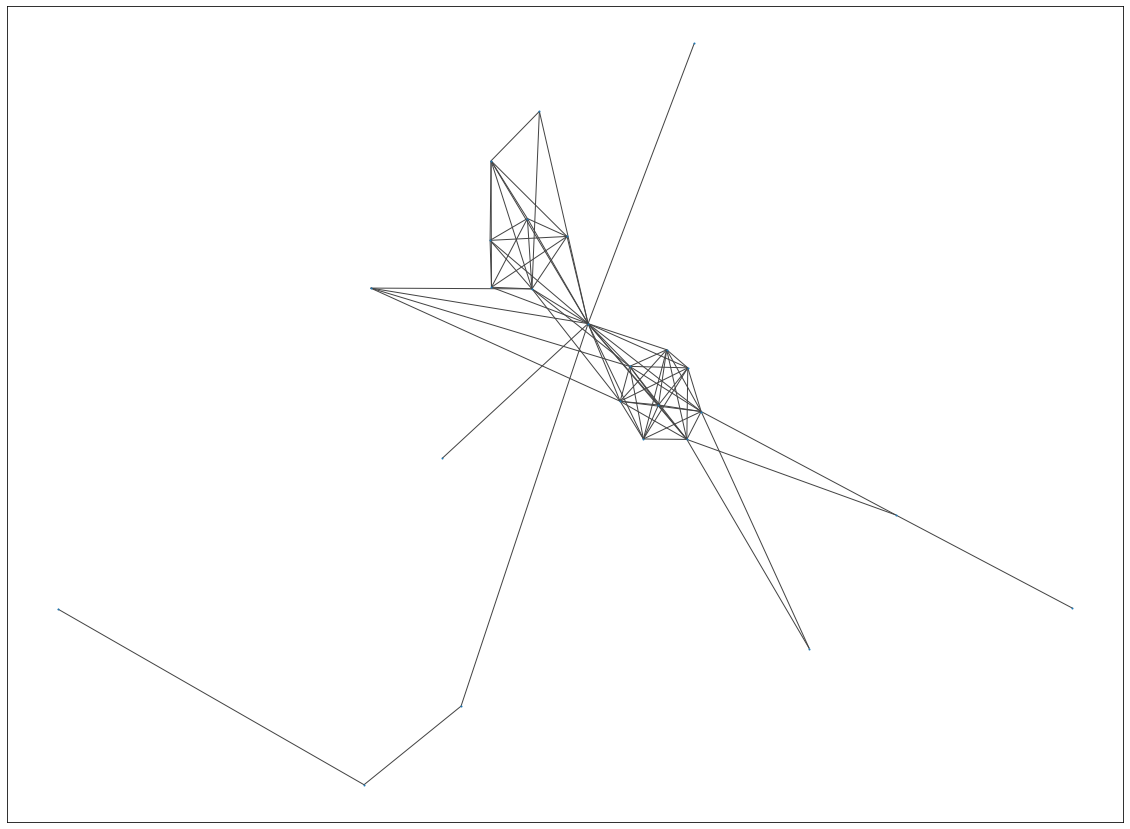

In [29]:
pos = nx.fruchterman_reingold_layout(mentionsG) #fruchterman_reingold 
plt.rcParams.update({'figure.figsize': (20, 15)})
nx.draw_networkx(
    mentionsG, 
    pos=pos, 
    node_size=1, 
    edge_color="#444444", 
    alpha=1, 
    with_labels=False)

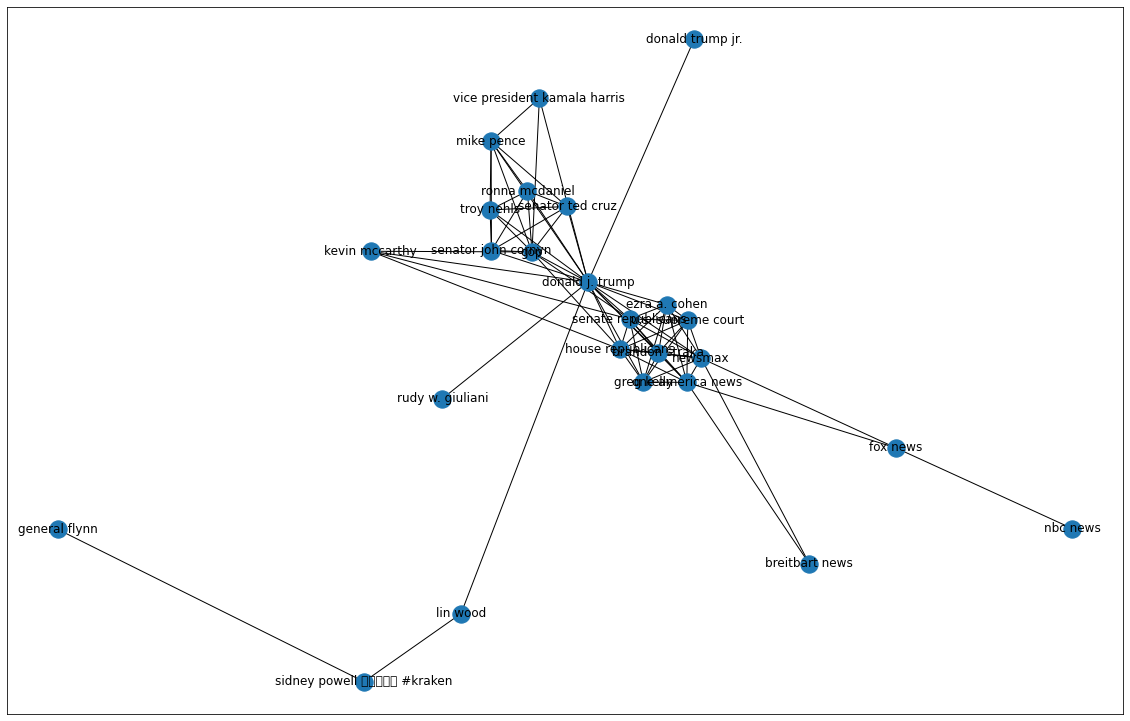

In [30]:
plt.figure(figsize = (20,13))
nx.draw_networkx(mentionsG, pos=pos)
plt.savefig("images/mentions110.png", format = "png", dpi = 300)
plt.show()

In [32]:
# hashG=nx.path_graph('stopthesteal')
nx.write_gexf(mentionsG, "gexf/mentions50.gexf")